<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Supervised_Learning_Neural_Network_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classifier

## 	One hidden layer with 5, 10, 20, 25 neurons

Final shape after preprocessing: (74724, 689)
Train shape: (52306, 689) Test shape: (22418, 689)

🔹 Training model with 5 hidden neurons
✔ Hidden neurons: 5, Parameters: 3606, Accuracy: 0.8826

🔹 Training model with 10 hidden neurons
✔ Hidden neurons: 10, Parameters: 7186, Accuracy: 0.9330

🔹 Training model with 20 hidden neurons
✔ Hidden neurons: 20, Parameters: 14346, Accuracy: 0.9484

🔹 Training model with 25 hidden neurons
✔ Hidden neurons: 25, Parameters: 17926, Accuracy: 0.9514


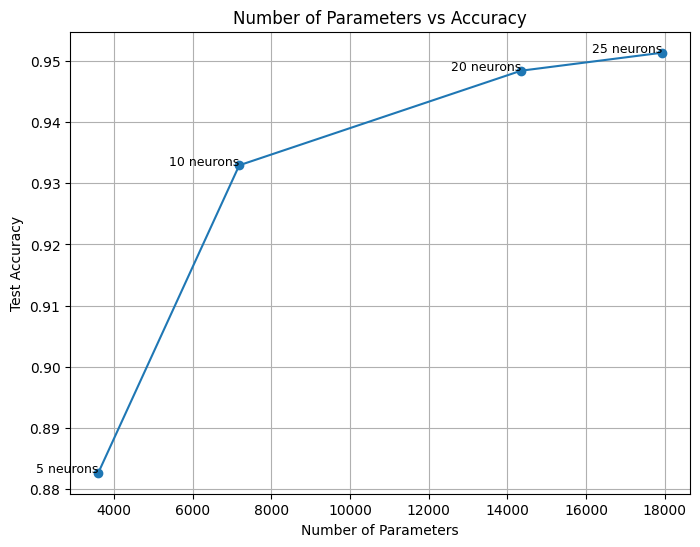


🏆 Best model has 25 hidden neurons with Accuracy = 0.9514
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           A       0.95      0.96      0.95       862
           B       0.97      0.94      0.95       862
           C       0.95      0.97      0.96       862
           D       0.97      0.94      0.96       862
           E       0.95      0.94      0.95       862
           F       0.95      0.96      0.95       862
           G       0.97      0.93      0.95       863
           H       0.96      0.94      0.95       863
           I       0.92      0.94      0.93       862
           J       0.94      0.95      0.94       862
           K       0.93      0.97      0.95       863
           L       0.97      0.96      0.97       862
           M       0.93      0.94      0.94       862
           N       0.96      0.93      0.94       862
           O       0.96      0.95      0.96       863
         

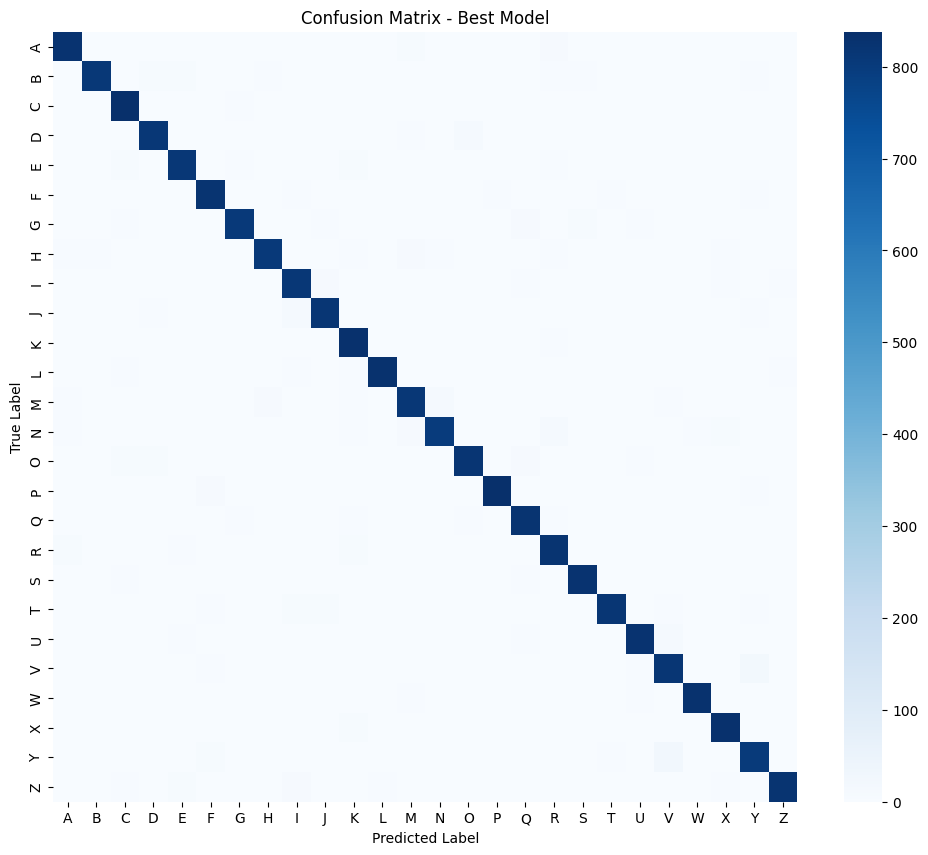

In [ ]:
# ==============================
# STEP 1: Install & Import Packages
# ==============================
!pip install tensorflow matplotlib scikit-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# ==============================
# STEP 2: Load Dataset
# ==============================
file_path = "/content/tmnst Dataset.csv"   # <-- upload to Colab first
df = pd.read_csv(file_path)

# Features & labels
X = df.drop(columns=['labels']).values
y = df['labels'].values

# Remove zero-only columns
non_zero_columns = np.where(X.sum(axis=0) != 0)[0]
X = X[:, non_zero_columns]

# Normalize [0,255] -> [0,1]
X = X / 255.0

print("Final shape after preprocessing:", X.shape)

# ==============================
# STEP 3: Encode Labels & Split
# ==============================
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.3, stratify=y_encoded, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ==============================
# STEP 4: Train Models with Different Architectures
# ==============================
hidden_neurons = [5, 10, 20, 25]
param_counts = []
accuracies = []
models = []  # store trained models

for neurons in hidden_neurons:
    print(f"\n🔹 Training model with {neurons} hidden neurons")

    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(neurons, activation='relu'),
        Dense(26, activation='softmax')  # Softmax output for 26 classes
    ])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10, batch_size=128, verbose=0
    )

    # Evaluate on test set
    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    # Store results
    param_counts.append(model.count_params())
    accuracies.append(acc)
    models.append(model)

    print(f"✔ Hidden neurons: {neurons}, Parameters: {model.count_params()}, Accuracy: {acc:.4f}")

# ==============================
# STEP 5: Plot Results (Parameters vs Accuracy)
# ==============================
plt.figure(figsize=(8,6))
plt.plot(param_counts, accuracies, marker='o', linestyle='-')
for i, neurons in enumerate(hidden_neurons):
    plt.text(param_counts[i], accuracies[i], f"{neurons} neurons", fontsize=9, ha='right')
plt.title("Number of Parameters vs Accuracy")
plt.xlabel("Number of Parameters")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

# ==============================
# STEP 6: Best Model - Confusion Matrix & Report
# ==============================
best_idx = np.argmax(accuracies)
best_model = models[best_idx]

print(f"\n🏆 Best model has {hidden_neurons[best_idx]} hidden neurons "
      f"with Accuracy = {accuracies[best_idx]:.4f}")

# Predictions
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Recommendations:

Model is trained with;
1.   5 neurons
2.   10 neurons
3.   20 neurons
4.   25 neurons

From Parameter - Accuracy curve it is clear that model with 25 neurons has highest accuracy (0.9494) and parameters (17926).



Confusion matrix values

701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


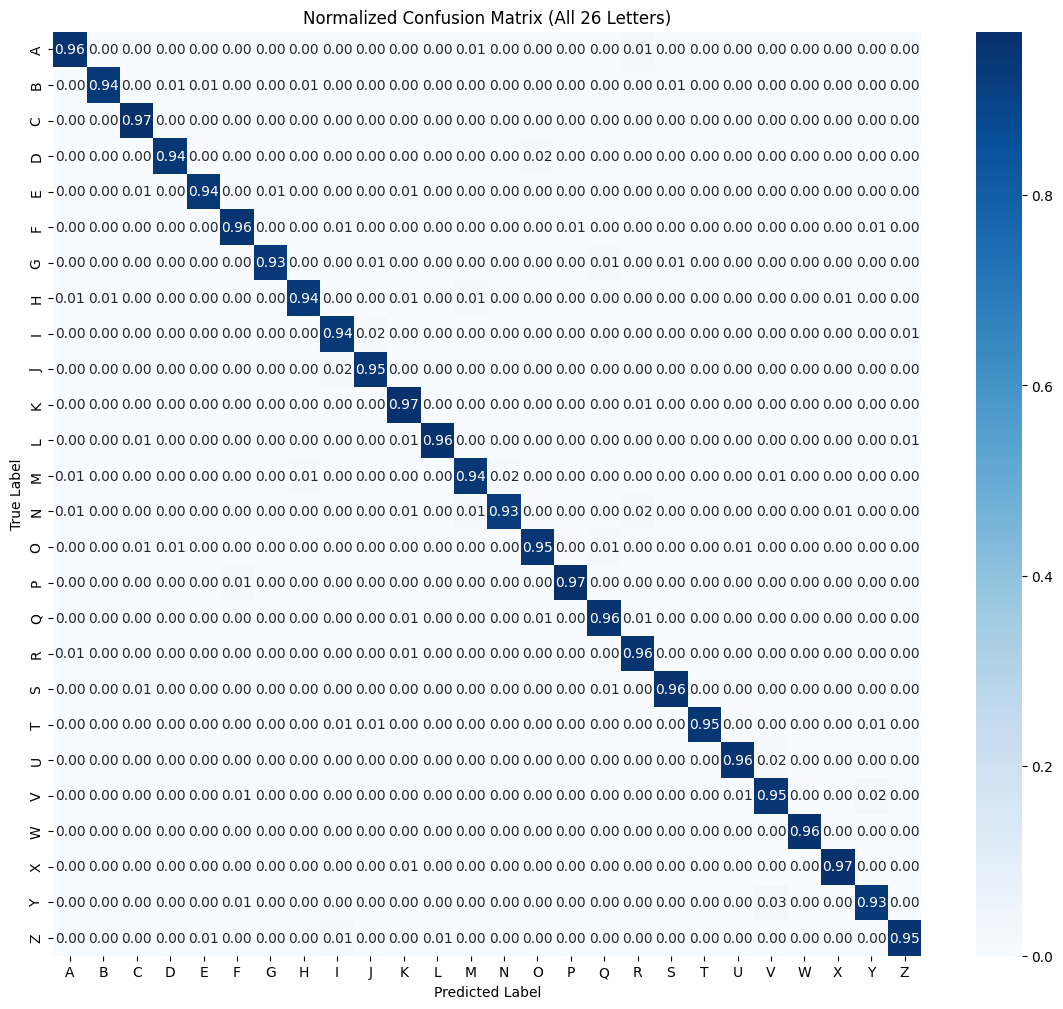

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predictions for best model
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix (normalize by row so each row sums to 1)
cm = confusion_matrix(y_true, y_pred, normalize='true')

plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Normalized Confusion Matrix (All 26 Letters)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Recommendation:


As this is an classification problem so the values apart from diagonal are almost zero. Values in diagonal direction are near to 1.

## 	Two hidden layers with (5, 5), (5, 10), (10, 5), (10, 10) neurons in (layer 1, layer 2)


🔹 Training model with layers (5, 5) neurons
✔ Hidden layers (5,5), Parameters: 3636, Accuracy: 0.8611

🔹 Training model with layers (5, 10) neurons
✔ Hidden layers (5,10), Parameters: 3796, Accuracy: 0.8950

🔹 Training model with layers (10, 5) neurons
✔ Hidden layers (10,5), Parameters: 7111, Accuracy: 0.9007

🔹 Training model with layers (10, 10) neurons
✔ Hidden layers (10,10), Parameters: 7296, Accuracy: 0.9342


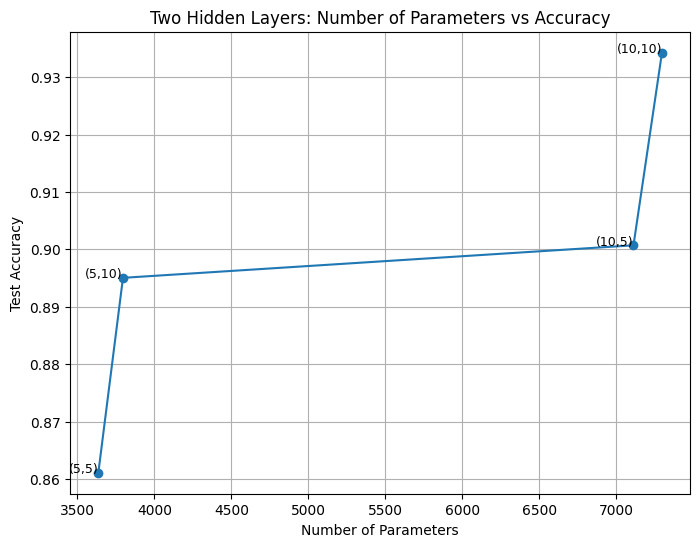

In [ ]:
# ==============================
# Two Hidden Layer Architectures
# ==============================

two_layer_configs = [(5, 5), (5, 10), (10, 5), (10, 10)]
param_counts_2 = []
accuracies_2 = []

for (n1, n2) in two_layer_configs:
    print(f"\n🔹 Training model with layers ({n1}, {n2}) neurons")

    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(n1, activation='relu'),
        Dense(n2, activation='relu'),
        Dense(26, activation='softmax')  # 26 classes
    ])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10, batch_size=128, verbose=0
    )

    # Evaluate on test set
    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    # Store results
    param_counts_2.append(model.count_params())
    accuracies_2.append(acc)

    print(f"✔ Hidden layers ({n1},{n2}), Parameters: {model.count_params()}, Accuracy: {acc:.4f}")

# ==============================
# Plot Results
# ==============================
plt.figure(figsize=(8,6))
plt.plot(param_counts_2, accuracies_2, marker='o', linestyle='-')

# Annotate each point with config
for i, (n1, n2) in enumerate(two_layer_configs):
    plt.text(param_counts_2[i], accuracies_2[i], f"({n1},{n2})", fontsize=9, ha='right')

plt.title("Two Hidden Layers: Number of Parameters vs Accuracy")
plt.xlabel("Number of Parameters")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()


Recommendation:


With 2-Layer Hidden Architecture with layers (10,10) has highest accuracy (0.9218) and parameters (7296)

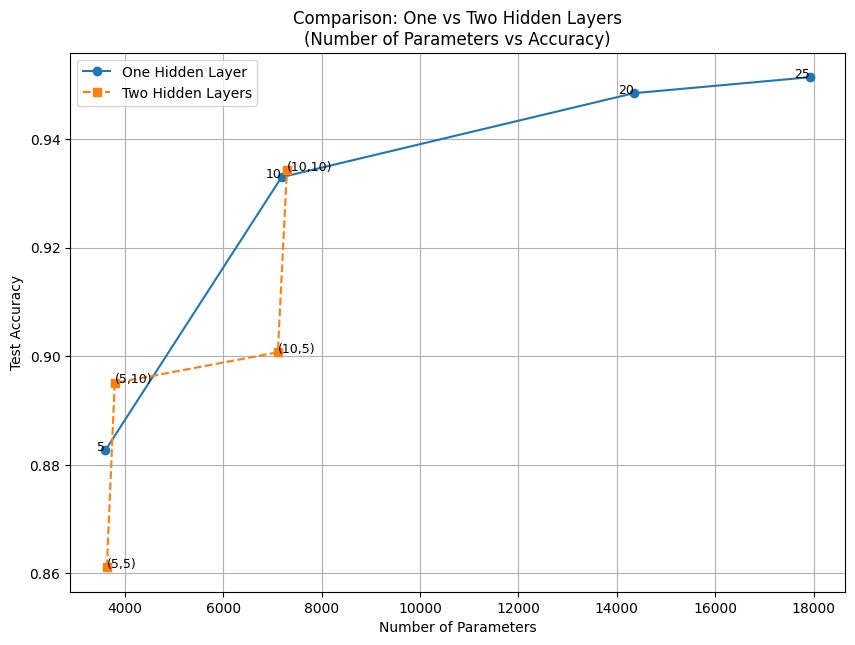

In [ ]:
# ==============================
# COMPARISON: One vs Two Hidden Layers
# ==============================

plt.figure(figsize=(10,7))

# One hidden layer results
plt.plot(param_counts, accuracies, marker='o', linestyle='-', label="One Hidden Layer")
for i, neurons in enumerate(hidden_neurons):
    plt.text(param_counts[i], accuracies[i], f"{neurons}", fontsize=9, ha='right')

# Two hidden layers results
plt.plot(param_counts_2, accuracies_2, marker='s', linestyle='--', label="Two Hidden Layers")
for i, (n1, n2) in enumerate(two_layer_configs):
    plt.text(param_counts_2[i], accuracies_2[i], f"({n1},{n2})", fontsize=9, ha='left')

# Plot settings
plt.title("Comparison: One vs Two Hidden Layers\n(Number of Parameters vs Accuracy)")
plt.xlabel("Number of Parameters")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Recommendation:

From the above plot it is clear that accuracy is better for model with one -hidden layers than with two-hidden layers.

## Conclusion

In [ ]:
from google.colab import files

# Download the results CSV file
try:
  files.download('model_comparison_results.csv')
except FileNotFoundError:
  print("model_comparison_results.csv not found. Please run the previous cell to generate it.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Results Table:
  Architecture  Parameters  Accuracy
0          1-5        3606  0.882639
1         1-10        7186  0.932956
2         1-20       14346  0.948434
3         1-25       17926  0.951378
4        2-5-5        3636  0.861094
5       2-5-10        3796  0.895040
6       2-10-5        7111  0.900705
7      2-10-10        7296  0.934249

Results table saved to model_comparison_results.csv


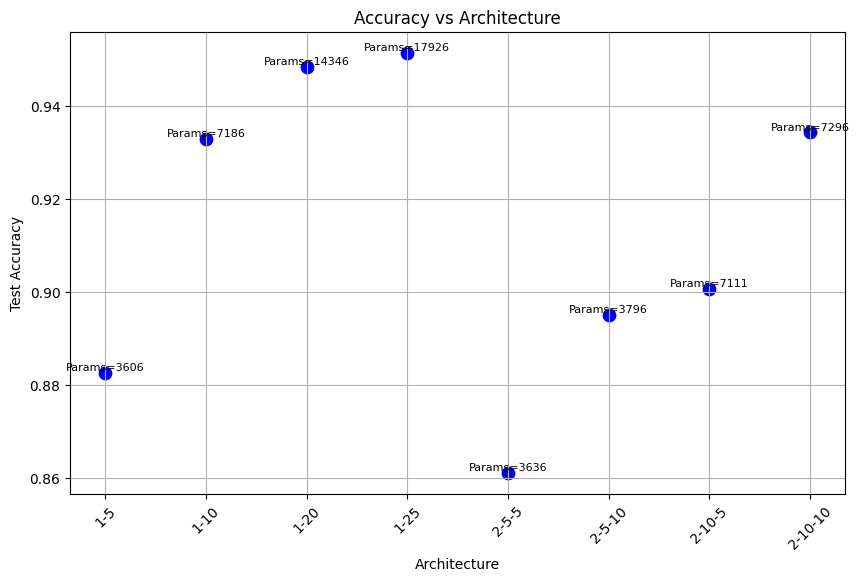

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# STEP 1: Prepare Results Table
# ==============================
# One hidden layer results
arch_1 = [f"1-{n}" for n in hidden_neurons]
params_1 = param_counts
accs_1 = accuracies

# Two hidden layer results
arch_2 = [f"2-{n1}-{n2}" for (n1, n2) in two_layer_configs]
params_2 = param_counts_2
accs_2 = accuracies_2

# Combine into one table
results = pd.DataFrame({
    "Architecture": arch_1 + arch_2,
    "Parameters": params_1 + params_2,
    "Accuracy": accs_1 + accs_2
})

print("📊 Results Table:")
print(results)

# Save the results to a CSV file
results.to_csv("model_comparison_results.csv", index=False)
print("\nResults table saved to model_comparison_results.csv")


# ==============================
# STEP 2: Scatter Plot (Architecture vs Accuracy)
# ==============================
plt.figure(figsize=(10,6))
plt.scatter(results["Architecture"], results["Accuracy"], c="blue", s=80)

# Annotate with parameter counts
for i, row in results.iterrows():
    plt.text(row["Architecture"], row["Accuracy"], f"Params={row['Parameters']}",
             fontsize=8, ha='center', va='bottom')

plt.title("Accuracy vs Architecture")
plt.xlabel("Architecture")
plt.ylabel("Test Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Observation:

From the results table it is clear that Architecture with 25 neurons has the highest accuracy. As the number of neurons increases accuracy is increasing.

As the number of hidden layers are increasing the accuracy is not improving to that extent.